In [1]:
import numpy as np
import quantities as pq
import elephant
#import vizi
#import misc
import matplotlib.pyplot as plt
import neo
import seaborn as sns
%matplotlib inline
import validation_functions as vf
datas = vf.get_all_data()

In [2]:
# Define a useful function within a script like this:
def get_neuron_type(data, neuron_type):
    """
    Filters the data for a given neuron_type (exc or inh)
    Example use: data_exc, eIds = get_neuron_type(data1, 'exc')
    """
    ids = []
    for i in xrange(len(data)):
        if data[i].annotations['neuron_type']==neuron_type:
            ids.append(i)
    return data[ids], ids

In [3]:
import numpy as np
fano_factors=[]
for idx,j in enumerate(datas):
    counter2=[]
    for x in range(120):
        counter=[]
        for i in j:
            counter.append(len([y for y in i if  y>=x and y<(x+1)]))
        firing_rate=np.divide(counter, 1.0)
        counter2.append(np.var(firing_rate)/np.mean(firing_rate))
    fano_factors.append(counter2)

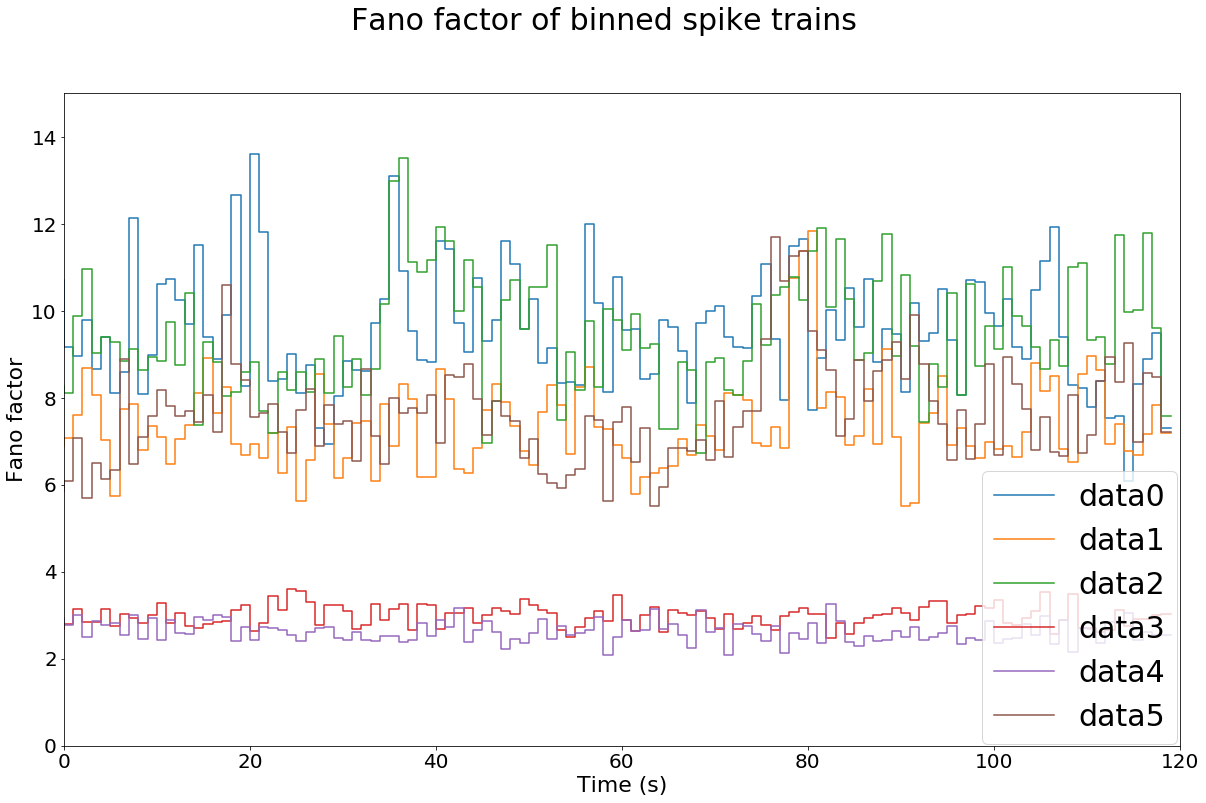

In [5]:
fig, ax = plt.subplots(figsize=(20,12))
[ax.step(range(120),fano,label="data"+str(idx)) for idx,fano in enumerate(fano_factors)]
plt.ylim(0, 15)
plt.xlim(0, 120)
fig.suptitle("Fano factor of binned spike trains", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Time (s)', fontsize=22)
plt.ylabel('Fano factor', fontsize=22)
ax.legend(prop={'size': 30},loc=9, bbox_to_anchor=(0.91, 0.445))
plt.savefig("Fano_fact_plot.png")

In [19]:
for j in datas:        #iterate through data sets
    data_exc, eIds = get_neuron_type(j, 'exc')
    data_inh, iIds = get_neuron_type(j, 'inh')
    counter=[]
    for i in j: 
        counter.append(len(i))    #calc the spike numbers of data1,data2....

    firing_rate=np.divide(counter, 200.0)   #calc the firing rate (number of spikes/time interval)
    print(" ")
    print(np.var(firing_rate)/np.mean(firing_rate))    #fano factor for all the data = variance of firing rate/mean of firing rate 
    


 
6.28688569233
 
5.48246495545
 
6.89306089313
 
2.36357898235
 
1.90354211742
 
5.2138435138


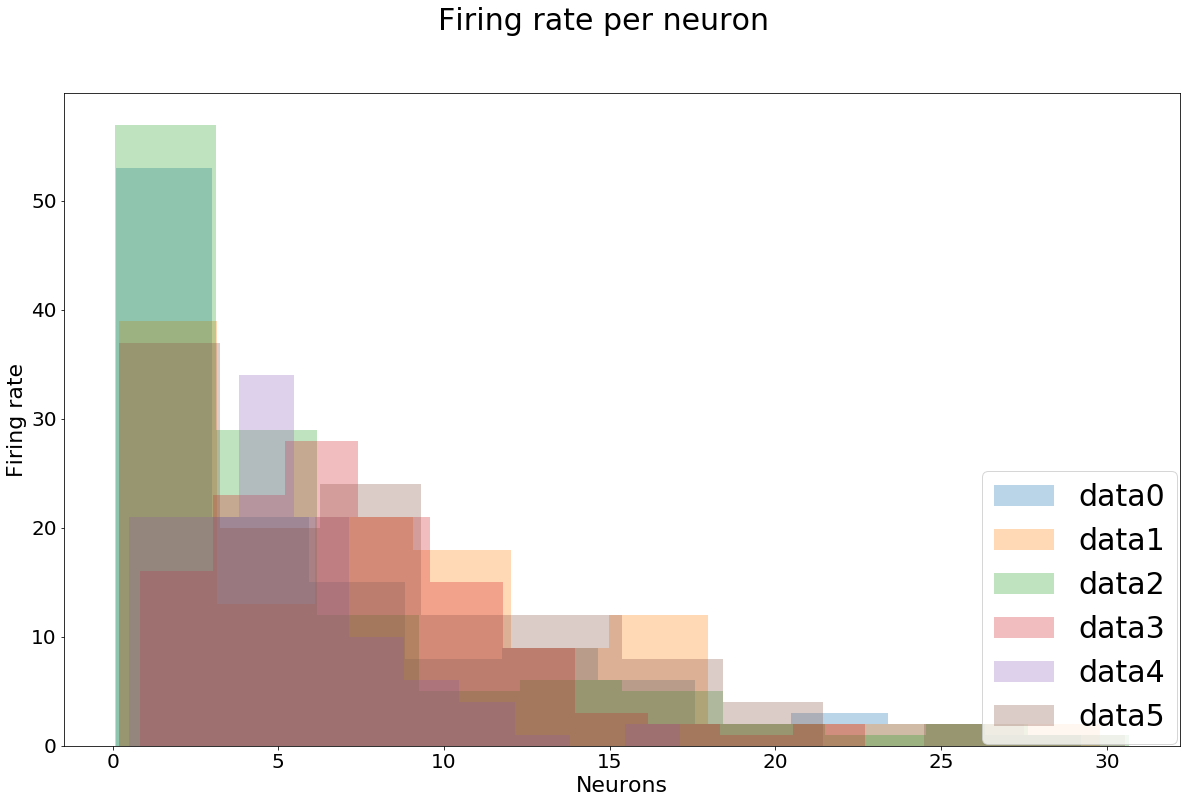

In [10]:

firing_rate2=[]
for j in datas:        #iterate through data sets
    data_exc, eIds = get_neuron_type(j, 'exc')
    data_inh, iIds = get_neuron_type(j, 'inh')
    counter=[]
    for i in j: 
        counter.append(len(i))    #calc the spike numbers of data1,data2....

    firing_rate2.append(np.divide(counter, 200.0))   #calc the firing rate (number of spikes per neuron/time interval) 

fig, ax = plt.subplots(figsize=(20,12))
[ax.hist(fire,label="data"+str(idx),alpha=0.3) for idx,fire in enumerate(firing_rate2)]
fig.suptitle("Firing rate per neuron", fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Neurons', fontsize=22)
plt.ylabel('Firing rate', fontsize=22)
ax.legend(prop={'size': 30},loc=9, bbox_to_anchor=(0.91, 0.445))
plt.savefig("Firing_plot.png")

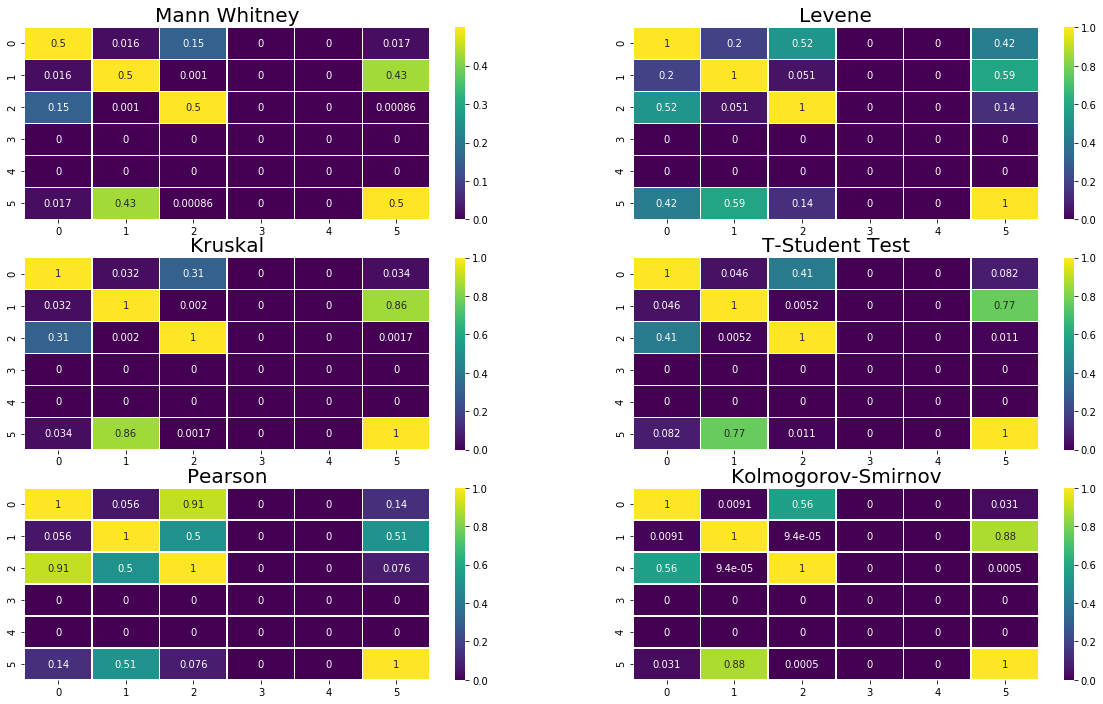

In [30]:
from scipy.stats import ks_2samp, ttest_ind, mannwhitneyu, levene, anderson_ksamp, kruskal, pearsonr
# The KS test quantifies the maximal vertical distance between the cumulative distribution functions
mannw=np.ones([6,6])
levene_arr=np.ones([6,6])
pearson=np.ones([6,6])
kruskal_arr=np.ones([6,6])
ks_2samp_arr=np.ones([6,6])
ttest_arr=np.ones([6,6])
for i in range(len(firing_rate2)):
    for j in range(len(firing_rate2)):
        DKS, p_value = mannwhitneyu(firing_rate2[i], firing_rate2[j])
        mannw[i][j]=p_value
        DKS, p_value = levene(firing_rate2[i], firing_rate2[j])
        levene_arr[i][j]=p_value
        DKS, p_value = ks_2samp(firing_rate2[i], firing_rate2[j])
        ks_2samp_arr[i][j]=p_value
        DKS, p_value = kruskal(firing_rate2[i], firing_rate2[j])
        kruskal_arr[i][j]=p_value
        DKS, p_value = ttest_ind(firing_rate2[i], firing_rate2[j])
        ttest_arr[i][j]=p_value
        DKS,p_value = pearsonr(firing_rate2[i], firing_rate2[j])
        pearson[i][j]=1-p_value
        if i==3 or i==4 or j==3 or j==4:
            mannw[i][j]=0
            levene_arr[i][j]=0
            ks_2samp_arr[i][j]=0
            kruskal_arr[i][j]=0
            ttest_arr[i][j]=0
            pearson[i][j]=0
        

fig, ax = plt.subplots(3,2,figsize=(20,12))         # Sample figsize in inches
sns.heatmap(mannw, annot=True, linewidths=.5, ax=ax[0,0],cmap='viridis')
sns.heatmap(levene_arr, annot=True, linewidths=.5, ax=ax[0,1],cmap='viridis')
sns.heatmap(kruskal_arr, annot=True, linewidths=.5, ax=ax[1,0],cmap='viridis')
sns.heatmap(ttest_arr, annot=True, linewidths=.5, ax=ax[1,1],cmap='viridis')
sns.heatmap(pearson, annot=True, linewidths=.5, ax=ax[2,0],cmap='viridis')
sns.heatmap(ks_2samp_arr, annot=True, linewidths=.5, ax=ax[2,1],cmap='viridis')
ax[0,0].set_title('Mann Whitney',fontsize=20)
ax[0,1].set_title('Levene',fontsize=20)
ax[1,0].set_title('Kruskal',fontsize=20)
ax[1,1].set_title('T-Student Test',fontsize=20)
ax[2,0].set_title('Pearson',fontsize=20)
ax[2,1].set_title('Kolmogorov-Smirnov',fontsize=20)
plt.savefig("Tests.png")

# A large KS distance (DKS) and small p value indicate a discrepancy of the distribution 
# -> rejection of the null hypothesis